<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**

In [237]:
import pandas as pd
import seaborn as sns
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc

%matplotlib inline




In [2]:
# project_id = "bigquery-dsi-rashim"

# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
# """

# reviews = pd.read_gbq(sql, project_id=project_id)

# reviews = pd.open_csv("../../project-04/reviews.csv")

In [3]:
# project_id = "bigquery-dsi-rashim"

# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.business] 
# """

# business = pd.read_gbq(sql, project_id=project_id)
#  business = pd.open_csv("../../project-04/business.csv")

In [4]:
# project_id = "bigquery-dsi-rashim"

# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 
# """

# users = pd.read_gbq(sql, project_id=project_id)

# users = pd.open_csv("../../project-04/users.csv")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [ ]:
--> 

In [5]:
business= pd.read_csv("../../project-04/businesses_changed.csv")

In [6]:
for i in business.columns:
    print i    

Unnamed: 0
business_id
name
review_count
city
stars
categories
latitude
longitude
neighborhoods
variable
value


In [7]:
cols = ['business_id', 'review_count', 'city', 'stars', 'categories']

In [8]:
business = pd.pivot_table(business, values='value', columns='variable', index=cols).reset_index()

In [9]:
business.head()

variable,business_id,review_count,city,stars,categories,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",True,None,None,False,None,...,None,None,None,None,None,None,None,None,None,True
1,-0HGqwlfw3I8nkJyMHxAsQ,9,Phoenix,3.0,"['Burgers', 'Fast Food', 'Restaurants']",True,None,None,False,None,...,None,None,None,None,None,None,None,None,None,True
2,-0VK5Z1BfUHUYq4PoBYNLw,5,Las Vegas,3.5,"['Bars', 'Nightlife', 'Lounges']",True,None,None,False,True,...,None,None,None,None,None,None,None,None,None,True
3,-0bUDim5OGuv8R0Qqq6J4A,8,Phoenix,2.0,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re...",True,None,None,None,None,...,None,None,None,None,None,None,None,None,None,False
4,-1bOb2izeJBZjHC7NWxiPA,120,Phoenix,4.0,"['Breakfast & Brunch', 'Cafes', 'American (Tra...",True,None,None,False,True,...,False,False,False,False,False,False,False,False,False,True


In [10]:
business.shape

(4132, 83)

In [11]:
business_columns = [columns.replace('.', '_').replace(' ', '_').replace('-','_').replace('/','_').replace('attributes_','') for columns in business.columns]

In [12]:
business.columns = business_columns

In [13]:
business["dummy_city"] = business["city"].map(lambda x: 1 if x == "Las Vegas" else 0)

In [14]:
business.dummy_city.unique()

array([1, 0])

In [15]:
business.shape

(4132, 84)

In [16]:
business = business.fillna(0)

In [227]:
predictor = ' + '.join([x for x in business.columns if not x in ['neighborhoods','dummy_city', 'stars', 'categories','business_id','name','review_count','city','', "Accepts_Credit_Cards" ,"Ambience_hipster" , "BYOB ", "BYOB_Corkage", "By_Appointment_Only" ,"Caters", "Corkage", "Delivery", "Dietary_Restrictions_dairy_free", "Dietary_Restrictions_gluten_free","Dietary_Restrictions_halal","Dietary_Restrictions_kosher","Dietary_Restrictions_soy_free", "Dietary_Restrictions_vegan","Dietary_Restrictions_vegetarian","Dogs_Allowed" +"Drive_Thru","Good_For_breakfast","Good_For_brunch","Good_For_dessert","Good_For_lunch","Good_for_Kids","Has_TV","Music_background_music","Music_jukebox","Music_live" ,"Noise_Level", "Open_24_Hours", "Order_at_Counter", "Outdoor_Seating","Parking_garage", "Parking_lot", "Parking_street", "Parking_validated", "Price_Range", "Take_out", "Takes_Reservations",  "Wheelchair_Accessible" , "hours_Friday_close", "hours_Friday_open", "hours_Monday_close","hours_Monday_open", "hours_Saturday_close","hours_Saturday_open", "hours_Sunday_close", "hours_Sunday_open", "hours_Thursday_close","hours_Thursday_open", "hours_Tuesday_close","hours_Tuesday_open","hours_Wednesday_close","hours_Wednesday_open","open"
]])
formula = 'dummy_city ~ ' + predictor
formula



'dummy_city ~ Accepts_Insurance + Ages_Allowed + Alcohol + Ambience_casual + Ambience_classy + Ambience_divey + Ambience_intimate + Ambience_romantic + Ambience_touristy + Ambience_trendy + Ambience_upscale + Attire + BYOB + Coat_Check + Dogs_Allowed + Drive_Thru + Good_For_Dancing + Good_For_Groups + Good_For_dinner + Good_For_latenight + Happy_Hour + Music_dj + Music_karaoke + Music_video + Parking_valet + Smoking + Waiter_Service + Wi_Fi'

In [228]:
y, X =  patsy.dmatrices(formula, business, return_type="dataframe")

In [229]:
print y.shape, X.shape

(4132, 1) (4132, 29)


In [230]:
X.shape

(4132, 29)

In [231]:
X.columns

Index([u'Intercept', u'Accepts_Insurance[T.True]', u'Ages_Allowed[T.True]',
       u'Alcohol[T.True]', u'Ambience_casual[T.True]',
       u'Ambience_classy[T.True]', u'Ambience_divey[T.True]',
       u'Ambience_intimate[T.True]', u'Ambience_romantic[T.True]',
       u'Ambience_touristy[T.True]', u'Ambience_trendy[T.True]',
       u'Ambience_upscale[T.True]', u'Attire[T.True]', u'BYOB[T.True]',
       u'Coat_Check[T.True]', u'Dogs_Allowed[T.True]', u'Drive_Thru[T.True]',
       u'Good_For_Dancing[T.True]', u'Good_For_Groups[T.True]',
       u'Good_For_dinner[T.True]', u'Good_For_latenight[T.True]',
       u'Happy_Hour[T.True]', u'Music_dj[T.True]', u'Music_karaoke[T.True]',
       u'Music_video[T.True]', u'Parking_valet[T.True]', u'Smoking[T.True]',
       u'Waiter_Service[T.True]', u'Wi_Fi[T.True]'],
      dtype='object')

In [232]:
y.columns

Index([u'dummy_city'], dtype='object')

In [233]:
y = y.values.ravel()

In [234]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xn = ss.fit_transform(X)


In [235]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.7s


{'penalty': 'l1', 'C': 20.408261224489795, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.8s finished


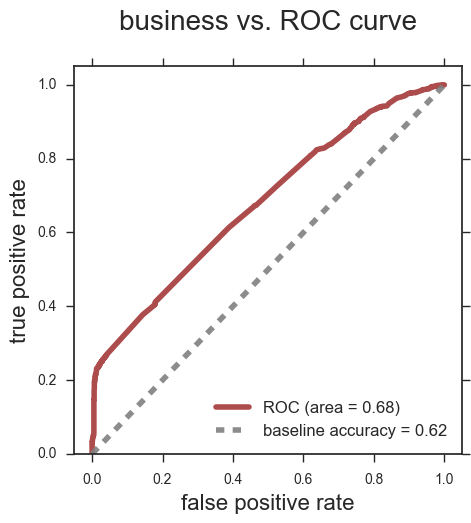

In [236]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,5))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()
    
scale = StandardScaler()
Xn = scale.fit_transform(X)

plot_roc(best_lr, Xn, y, 'business')

In [219]:
# import statsmodels.formula.api as sm
# import seaborn as sns
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# f = 'y ~ Xn'
# reg_results = sm.ols(f, data=business).fit().summary()

# sns.set(style="ticks") 
# mpl.rc("figure", figsize=(10, 15))

# sns.coefplot(f, data,intercept=False)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [140]:
import pandas as pd
reviews = pd.read_csv('../../project-04/reviews_changed.csv')

In [141]:
reviews.head()

,Unnamed: 0,Unnamed: 0.1,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,0,0,ZaLZYDB-HeFAZKMIjNyCyA,qlpTJ9sHAh24TdQIKb2ZFw,0,qsWxbgQwuomXvMseg23DGg,0,1,2014-06-08,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,TjsABzuLx7k4sQG_L3txgg,eyEWPJaU2RwIareTyt8I-w,0,FKHv7FkblONv9qqBndJUrg,1,1,2013-03-29,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,Ofxlhi_HKp7myFDpwg9aIA,YMMWSqFhGT6IbWfcOmbTuw,0,K9fIADfO_zKFPFm75A1Hxw,0,1,2009-04-22,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,-Rwn_JlLqNEhQIaiA8gFlw,9Efbx9dLzU0Lb3123_lErw,0,UxvOXcoCRFRAVhRB0D9imw,0,1,2014-03-24,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,ajzzOmblivZzKJ6nLmtdjA,dOvVn6FJBTkcSPYuhtL5Ug,0,-xLwGUmmyKgsTtFOOXzjeg,0,1,2015-09-12,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
reviews.stars.unique()

array([1, 2, 3, 4])

In [143]:
del reviews["Unnamed: 0"]
del reviews["Unnamed: 0.1"]

In [144]:
review_columns = [columns.replace('_', ' ') for columns in reviews.columns]

In [145]:
count = 0
for i in reviews.columns:
    count = count + 1
    print i
    
print count

user_id
review_id
votes_cool
business_id
votes_funny
stars
date
votes_useful
minutes_10
minutes_15
minutes_20
minutes_30
bar_food
beer_selection
best_ve
bloody_mary
bottle_service
chicken_waffles
customer_service
dance_floor
decided_try
definitely_come
definitely_recommend
didn_want
don_know
don_like
don_think
don_want
eggs_benedict
fast_food
feel_like
felt_like
fish_chips
food_amazing
food_came
food_delicious
food_good
food_great
food_just
food_service
french_fries
french_toast
friday_night
fried_chicken
friendly_staff
good_food
good_place
good_service
good_thing
good_time
great_atmosphere
great_experience
great_food
great_place
great_service
great_time
happy_hour
hash_browns
highly_recommend
hip_hop
ice_cream
just_like
just_ok
just_right
las_vegas
late_night
like_place
little_bit
long_time
looked_like
looks_like
love_place
mac_cheese
make_sure
mashed_potatoes
medium_rare
minutes_later
new_york
onion_rings
place_good
place_great
place_just
potato_fries
pretty_good
quality_food
really_

In [146]:
review_columns = [columns.replace('_', ' ') for columns in reviews.columns]

In [147]:
reviews.columns = review_columns

In [148]:
service_focus = ['bottle service','customer service','food service','good service','great service','service excellent',
                'service food','service friendly','service good','service great','great atmosphere','great experience',
                'friendly staff','staff friendly','wait staff','super friendly', 'minutes 10' , 'minutes 15' , 'minutes 20', 'minutes 30',
                 'slow service','awesome service','excellent service','fast service','friendly service',
                'great customer','great staff','long wait','slow service']

other_focus = [x for x in reviews.columns if not x in ['bottle service','customer service','food service','good service','great service','service excellent',
                'service food','service friendly','service good','service great','great atmosphere','great experience',
                'friendly staff','staff friendly','wait staff','super friendly', 'minutes 10' , 'minutes 15' , 'minutes 20', 'minutes 30',
                 'slow service','awesome service','excellent service','fast service','friendly service',
                'great customer','great staff','long wait','slow service', 'user id', 'review id', 'votes cool', 'business id', 'votes funny', 'stars', 'date', 'votes useful']]

In [151]:
review_service = [x for x in reviews.columns if x in service_focus]
review_others = [x for x in reviews.columns if x in other_focus]
print review_service, '\n', '\n' ,  review_others

['minutes 10', 'minutes 15', 'minutes 20', 'minutes 30', 'bottle service', 'customer service', 'food service', 'friendly staff', 'good service', 'great atmosphere', 'great experience', 'great service', 'service excellent', 'service food', 'service friendly', 'service good', 'service great', 'staff friendly', 'super friendly', 'wait staff'] 

['bar food', 'beer selection', 'best ve', 'bloody mary', 'chicken waffles', 'dance floor', 'decided try', 'definitely come', 'definitely recommend', 'didn want', 'don know', 'don like', 'don think', 'don want', 'eggs benedict', 'fast food', 'feel like', 'felt like', 'fish chips', 'food amazing', 'food came', 'food delicious', 'food good', 'food great', 'food just', 'french fries', 'french toast', 'friday night', 'fried chicken', 'good food', 'good place', 'good thing', 'good time', 'great food', 'great place', 'great time', 'happy hour', 'hash browns', 'highly recommend', 'hip hop', 'ice cream', 'just like', 'just ok', 'just right', 'las vegas', 'l

In [152]:
reviews['service_focused'] = reviews.loc[:,review_service].sum(axis=1)
reviews['remaining_field'] = reviews.loc[:,review_others].sum(axis=1) 
print reviews.service_focused.unique()

[1 0 2 3 4]


In [153]:
reviews['service_star_count'] = 0
reviews['other_star_count'] = 0

In [154]:
reviews.loc[(reviews.service_focused >= reviews.remaining_field),'service_star_count'] = reviews.stars
reviews.loc[~(reviews.service_focused >= reviews.remaining_field),'other_star_count'] = reviews.stars

In [163]:
# Choosing our x and y variables:
variables = ['bar food', 'beer selection', 'best ve', 'bloody mary', 'chicken waffles', 'dance floor', 'decided try', 'definitely come', 'definitely recommend', 'didn want', 'don know', 'don like', 'don think', 'don want', 'eggs benedict', 'fast food', 'feel like', 'felt like', 'fish chips', 'food amazing', 'food came', 'food delicious', 'food good', 'food great', 'food just', 'french fries', 'french toast', 'friday night', 'fried chicken', 'good food', 'good place', 'good thing', 'good time', 'great food', 'great place', 'great time', 'happy hour', 'hash browns', 'highly recommend', 'hip hop', 'ice cream', 'just like', 'just ok', 'just right', 'las vegas', 'late night', 'like place', 'little bit', 'long time', 'looked like', 'looks like', 'love place', 'mac cheese', 'make sure', 'mashed potatoes', 'medium rare', 'minutes later', 'new york', 'onion rings', 'place good', 'place great', 'place just', 'potato fries', 'pretty good', 'quality food', 'really enjoyed', 'really good', 'really like', 'really nice', 'recommend place', 'red velvet', 'right away', 'saturday night', 'second time', 'sweet potato', 'tasted like', 'time vegas', 'try place', 've seen', 've tried']
x_with_service = reviews.loc[(reviews.service_star_count != 0), variables]
x_without_service =  reviews.loc[~(reviews.service_star_count != 0),variables]

y_with_service = reviews.loc[(reviews.service_star_count != 0),'service_star_count']
y_without_service = reviews.loc[~(reviews.service_star_count != 0),'other_star_count']

In [164]:
y_r_s = y_with_service.values.ravel()
y_r_n = y_without_service.values.ravel()

In [165]:

reg = ElasticNetCV()
model_with_service = reg.fit(x_with_service, y_with_service)
score_with_service = reg.score(x_with_service,y_with_service)
print 'R^2 with service: ',score_with_service

model_no_service = reg.fit(x_without_service,y_without_service)
score_no_service = reg.score(x_without_service,y_without_service)
print 'R^2 value without services: ',score_no_service    

R^2 with service:  0.0362635698111
R^2 value without services:  0.191229305959


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [117]:
for i in reviews.columns:
    print i

user_id
votes_cool
votes_funny
stars
votes_useful
minutes_10
minutes_15
minutes_20
minutes_30
bar_food
beer_selection
best_ve
bloody_mary
bottle_service
chicken_waffles
customer_service
dance_floor
decided_try
definitely_come
definitely_recommend
didn_want
don_know
don_like
don_think
don_want
eggs_benedict
fast_food
feel_like
felt_like
fish_chips
food_amazing
food_came
food_delicious
food_good
food_great
food_just
food_service
french_fries
french_toast
friday_night
fried_chicken
friendly_staff
good_food
good_place
good_service
good_thing
good_time
great_atmosphere
great_experience
great_food
great_place
great_service
great_time
happy_hour
hash_browns
highly_recommend
hip_hop
ice_cream
just_like
just_ok
just_right
las_vegas
late_night
like_place
little_bit
long_time
looked_like
looks_like
love_place
mac_cheese
make_sure
mashed_potatoes
medium_rare
minutes_later
new_york
onion_rings
place_good
place_great
place_just
potato_fries
pretty_good
quality_food
really_enjoyed
really_good
really_

In [118]:
users = pd.read_csv("../../project-04/users_changed.csv")
users.review_count.unique()

array([   1,    2,    9, ..., 1049, 1199,  724])

In [119]:
reviews = pd.read_csv("../../project-04/reviews_changed.csv")
reviews.head()

,Unnamed: 0,Unnamed: 0.1,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,0,0,ZaLZYDB-HeFAZKMIjNyCyA,qlpTJ9sHAh24TdQIKb2ZFw,0,qsWxbgQwuomXvMseg23DGg,0,1,2014-06-08,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,TjsABzuLx7k4sQG_L3txgg,eyEWPJaU2RwIareTyt8I-w,0,FKHv7FkblONv9qqBndJUrg,1,1,2013-03-29,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,Ofxlhi_HKp7myFDpwg9aIA,YMMWSqFhGT6IbWfcOmbTuw,0,K9fIADfO_zKFPFm75A1Hxw,0,1,2009-04-22,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,-Rwn_JlLqNEhQIaiA8gFlw,9Efbx9dLzU0Lb3123_lErw,0,UxvOXcoCRFRAVhRB0D9imw,0,1,2014-03-24,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,ajzzOmblivZzKJ6nLmtdjA,dOvVn6FJBTkcSPYuhtL5Ug,0,-xLwGUmmyKgsTtFOOXzjeg,0,1,2015-09-12,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#removing the columns containing the id's and the date since we wont be using these.

cols = [col for col in reviews.columns if col not in ['business_id','review_id','date', 'Unnamed: 0.1', 'Unnamed: 0']]
reviews = reviews[cols]

# assigning the review count to get the total number of counts for the nexrt step:
reviews["Reviews"] = 1

#reviews grouped by the user_id
review_gb = reviews.groupby('user_id').sum().reset_index()

In [121]:
review_gb.head()

,user_id,votes_cool,votes_funny,stars,votes_useful,minutes_10,minutes_15,minutes_20,minutes_30,bar_food,...,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,Reviews
0,-2HLYl4u61vJ2rTcrZ6YDA,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-2VqtJTmSoGFQWFIuJVZzg,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-45ytt4fp9gLbV1zmVeyGw,0,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-4ld1qpaBNLocSBe85jWnw,0,1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,-9NsC_ZjnmJr0KvoGAtKMA,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [122]:
users.head()

,Unnamed: 0,yelping_since,compliments_plain,review_count,compliments_cute,compliments_writer,fans,compliments_note,compliments_hot,compliments_cool,...,compliments_more,elite,name,user_id,votes_cool,compliments_list,votes_funny,compliments_photos,compliments_funny,votes_useful
0,0,2015-01,NaN,1,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Scott,dMeSxE7S6Yxhz3cBgd6Sjw,0,NaN,0,NaN,NaN,0
1,1,2015-01,NaN,1,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Diego,c-e0BxGy3eNtKzKDrrHyGw,0,NaN,0,NaN,NaN,0
2,2,2015-01,NaN,2,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Katie,tO-IKvmHn9kGobTcVweTeA,0,NaN,0,NaN,NaN,0
3,3,2015-01,NaN,9,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Ross,soPELsow5JAqNSYCUmntJg,2,NaN,1,NaN,NaN,0
4,4,2015-01,NaN,2,NaN,NaN,0,NaN,NaN,NaN,...,NaN,[],Pam,RR6dZa6dkrcgjKvEnI-Myw,0,NaN,0,NaN,NaN,0


In [123]:
users.elite.unique

<bound method Series.unique of 0                                                 []
1                                                 []
2                                                 []
3                                                 []
4                                                 []
5                                                 []
6                                                 []
7                                                 []
8                                                 []
9                                                 []
10                                                []
11                                                []
12                                                []
13                                                []
14                                                []
15                                                []
16                                                []
17                                                []
18             

In [124]:
#checking to see if the users were elite at some given time in the previous year using the users data:
users['target'] = users['elite'].map(lambda x: False if x == '[]' else True)
users['target'].value_counts()

False    127583
True      16623
Name: target, dtype: int64

In [125]:
users.fillna(value=0.,inplace=True)

In [126]:
users_reviews = users.merge(review_gb,how='inner',left_on='user_id',right_on='user_id')

In [127]:
users_reviews['target'].value_counts()

False    2131
True      730
Name: target, dtype: int64

In [128]:
users_reviews.head()

,Unnamed: 0,yelping_since,compliments_plain,review_count,compliments_cute,compliments_writer,fans,compliments_note,compliments_hot,compliments_cool,...,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff,Reviews
0,51,2015-01,0.0,5,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,61,2015-01,0.0,2,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,282,2015-01,0.0,3,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,290,2015-01,0.0,10,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,336,2015-01,0.0,5,0.0,0.0,1,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [129]:
y = users_reviews['target'] #Target

#Predictor
X = users_reviews[[col for col in users_reviews.columns if col not in ['elite','name','user_id','target','yelping_since']]]

scale = StandardScaler()
Xn = scale.fit_transform(X)

print(Xn.shape,y.shape)

((2861, 123), (2861,))


In [130]:
from sklearn.cross_validation import train_test_split
#Train/Test split by 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [75]:
# Setting the parameters to perform a grid search
lr_params = {
    'solver':['liblinear'],
    'penalty':['l1','l2'],
    'C':np.linspace(1, 5, 5)
}

noneliteusers_gs = GridSearchCV(LogisticRegression(), lr_params, cv=10, verbose=1)

noneliteusers_gs.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 1.,  2.,  3.,  4.,  5.]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [81]:
results = noneliteusers_gs.best_estimator_

print("Parameters and Score for Non-Elite Users")
print(noneliteusers_gs.best_params_)
print "\n"
print (noneliteusers_gs.best_score_,np.abs(0.5 - np.mean(y_train)) + 0.5)


Parameters and Score for Non-Elite Users
{'penalty': 'l2', 'C': 5.0, 'solver': 'liblinear'}


(0.91208791208791207, 0.74225774225774233)


In [82]:
def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,5))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

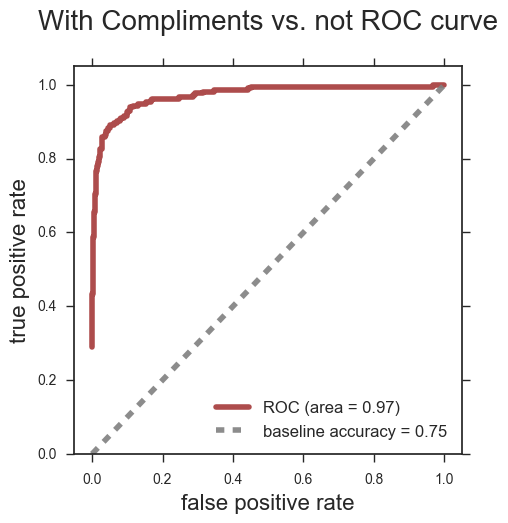

In [83]:
plot_roc(results, X_test, y_test, 'With Compliments')

In [133]:
y = users_reviews['target']
# X without compliments
X = users_reviews[[col for col in users_reviews.columns if col not in ['elite','name','user_id','target','yelping_since',
                                                      'compliments_plain','review_count','compliments_cute',
                                                       'compliments_writer','compliments_note','compliments_hot',
                                                       'compliments_cool','compliments_profile','compliments_more',
                                                       'votes_cool_x','compliments_list','votes_funny_x',
                                                       'compliments_photos','compliments_funny','votes_useful_x',
                                                       'votes_cool_y','votes_funny_y','votes_useful_y']]]

In [134]:
for i in X.columns:
    print i

Unnamed: 0
fans
average_stars
stars
minutes_10
minutes_15
minutes_20
minutes_30
bar_food
beer_selection
best_ve
bloody_mary
bottle_service
chicken_waffles
customer_service
dance_floor
decided_try
definitely_come
definitely_recommend
didn_want
don_know
don_like
don_think
don_want
eggs_benedict
fast_food
feel_like
felt_like
fish_chips
food_amazing
food_came
food_delicious
food_good
food_great
food_just
food_service
french_fries
french_toast
friday_night
fried_chicken
friendly_staff
good_food
good_place
good_service
good_thing
good_time
great_atmosphere
great_experience
great_food
great_place
great_service
great_time
happy_hour
hash_browns
highly_recommend
hip_hop
ice_cream
just_like
just_ok
just_right
las_vegas
late_night
like_place
little_bit
long_time
looked_like
looks_like
love_place
mac_cheese
make_sure
mashed_potatoes
medium_rare
minutes_later
new_york
onion_rings
place_good
place_great
place_just
potato_fries
pretty_good
quality_food
really_enjoyed
really_good
really_like
really_ni

In [135]:
from sklearn.cross_validation import train_test_split
#Train/Test split by 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [136]:
scale = StandardScaler()
Xn = scale.fit_transform(X)

print(Xn.shape,y.shape)

((2861, 105), (2861,))


In [137]:
lr_params = {
    'solver':['liblinear'],
    'penalty':['l1','l2'],
    'C':np.linspace(1, 5, 5)
}

results = GridSearchCV(LogisticRegression(), lr_params, cv=10, verbose=1)

results.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 1.,  2.,  3.,  4.,  5.]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,5))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


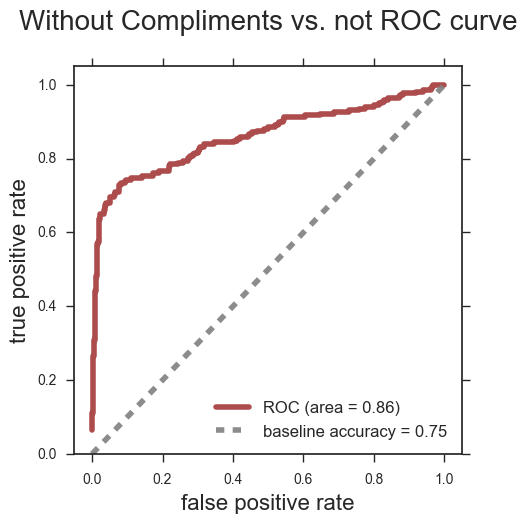

In [139]:
plot_roc(results, X_test, y_test, 'Without Compliments')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?